# Pie Charts, Box Plots, Scatter Plots, and Bubble Plots

### Objectives

- Explore matplotlib libraries futher
- Create pie charts, box plots, scatter plots and bubble charts

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('ggplot')

Importing data set - Immigration to Canada from 1980 to 2013. Detaile dexplation is given is previous projects (Data Pre-processing) do refer them before starting this project

In [2]:
url = ('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
df = pd.read_csv(url)
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [3]:
df.shape

(195, 39)

### Visualizing data using Matplotlib

For plotting the data easily, let's first set the country name as index - useful for quickly looking up countries using `.loc` method.

In [4]:
df.set_index('Country', inplace = True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [5]:
df.shape

(195, 38)

Finally, let;s create a list of years from 1980-2013, this will come in handy when we start plotting the data

In [6]:
years = list(map(str, range(1980, 2014)))

## Pie Charts

A pie chart is a circular grpahic that displays numeric proportions by dividing a circle (or pie) intp proportions by diving a circle (or pie) into proportional slices. We can create pie charts in Matplotlib by passing in the `kind = pie` keyword.

Let's use the pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

Step 1 - Gather data

We will use pandas `groupby` method to summarize the immigration data by `continent`. The general process of `groupby` involves the following steps:
1. Split: Splitting the data into groups based on some criteria.
2. Apply: Applying a function to each group independently: .sum(), .count(), .mean(), .std(), .aggregate(), .apply() ....etc,
3. Combine: Combining the results into a data structure,

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig4SplitApplyCombine.png" height="400" align="center">

In [9]:
#group countries by continent and apply sum() function
df_continents = df.groupby('Continent', axis = 0).sum()

#note - the output of the groupby method is a 'groupby' object
#we can't use it furture untill we apply a function (eg.sum())
print(type(df.groupby('Continent', axis = 0)))
df_continents.head()

C:\Users\ABID\AppData\Local\Temp\ipykernel_5956\1027875806.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_continents = df.groupby('Continent', axis = 0).sum()


<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


C:\Users\ABID\AppData\Local\Temp\ipykernel_5956\1027875806.py:6: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  print(type(df.groupby('Continent', axis = 0)))


,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaWestern AfricaSout...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaWestern AsiaWestern AsiaWestern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Southern EuropeSouthern EuropeWestern EuropeEa...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Step 2 - Plot the data. We will pass in `kind = 'pie'` keyword, along with the following additional parameters:

- `autopct` - is a string or function used to label the wedges with thir numeric values. The label will be placed inside the wedge. If it is a format string, the label will b e `fmt%pct`.
- `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
- `shadow` - Draws a shadow beneath the pie (to give a 3D feel). 

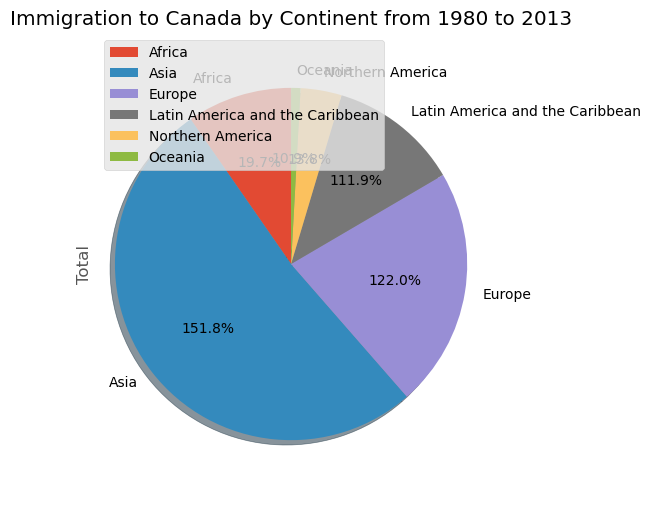

In [11]:
#autopct create %, start angle represent starting point
df_continents['Total'].plot(kind = 'pie', figsize = (5,6), autopct = '1%.1f%%', startangle = 90, shadow = True)

plt.title('Immigration to Canada by Continent from 1980 to 2013')
plt.axis('equal')
plt.legend(labels = df_continents.index, loc = 'upper left')

plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

- Remove the text label on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
- Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
- Pass in a custom set of colors for continents by passing in `colors` parameter.
- **Explode** the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Caribbean) by passing in `explode` parameter.

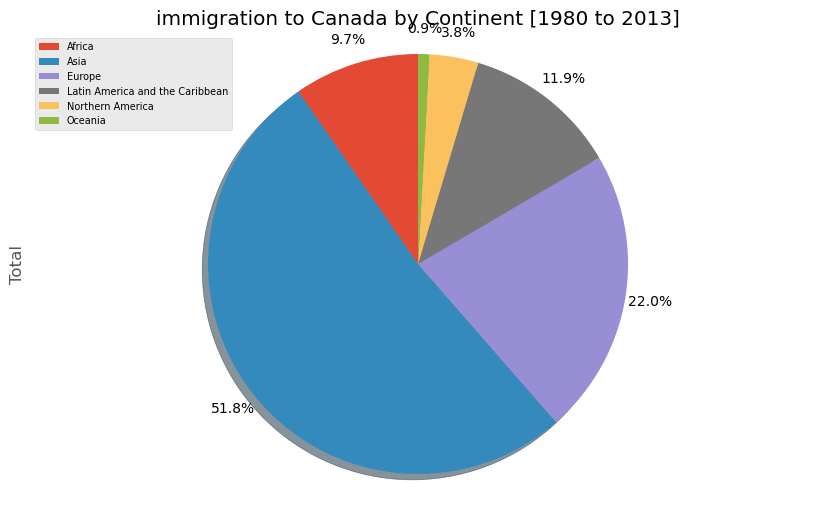

In [12]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0,1]

df_continents['Total'].plot(kind = 'pie', figsize = (10,6), autopct = '%1.1f%%', startangle = 90, shadow = True, labels = None, pctdistance = 1.12)

plt.title('immigration to Canada by Continent [1980 to 2013]')
plt.axis('equal')

plt.legend(labels = df_continents.index, loc = 'upper left', fontsize = 7)

plt.show()

          

Question - Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

note - We might need to play with the explore values in order to fix any overlapping slice values.

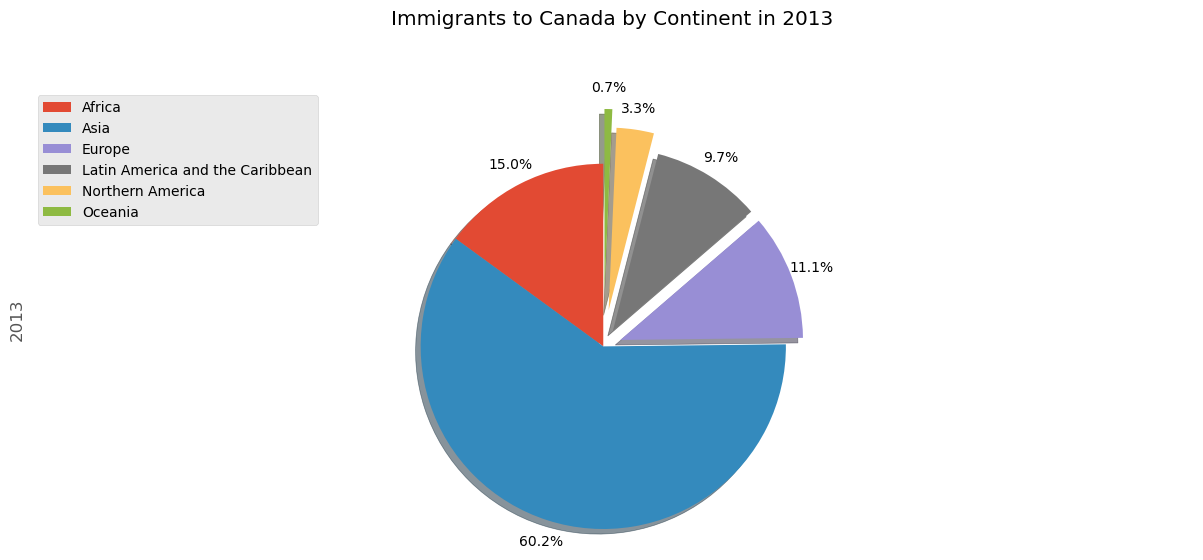

In [19]:
explode_list = [0.0, 0, 0.1, 0.1, 0.2, 0.3]

df_continents['2013'].plot(kind = 'pie', figsize = (15,6), autopct = '%1.1f%%', startangle = 90, shadow = True, labels = None, pctdistance = 1.12, explode=explode_list)

plt.title('Immigrants to Canada by Continent in 2013', y = 1.12)
plt.axis('equal')
plt.legend(labels = df_continents.index, loc = 'upper left')
plt.show()

In [14]:
print(len(df_continents['2013']))

6


## Box Plots

A box plot is a way of statistically representing the distribution of the data through five main dimensions.

- Minimum - The samallest number in the dataset excluding the outlier.
- Fisrst quartile - Middle number between the `minimum` and the `median`.
- Second quartile (Median) - Middle number of the (sorted) dataset.
- Third quartiel - Middle number between `median` and `maximum`.
- Maximum - The largest number in the dataset excluding the outliers.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width="440," align="center">

To make a box plot, we can use kind = 'box', in pot mwthod invoked on a pandas series or dataframe.

let's plot the box plot for the Japanese immigration between 1980 - 2013.

Step 1 - Get the subset of the dataset. Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the `df.describe()` method to view the percentiles.

In [21]:
#to get a dataframe place extra square baracket around 'Japan'
df_japan = df.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


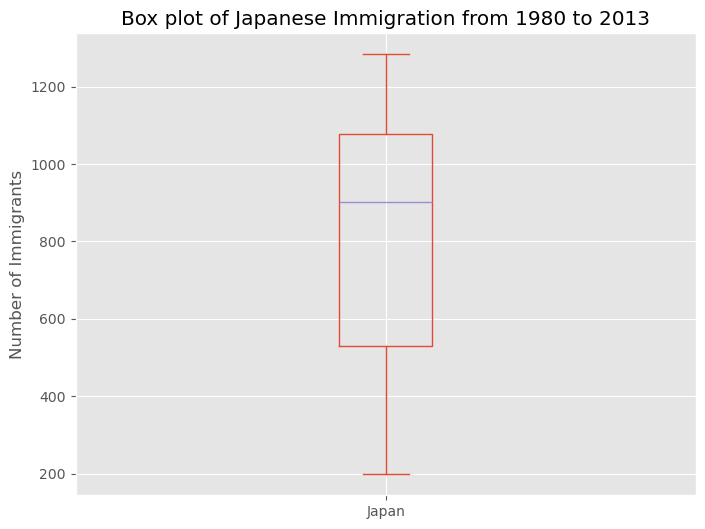

In [23]:
#step 2 - plot by using kind = ;box'
df_japan.plot(kind = 'box', figsize = (8,6))

plt.title('Box plot of Japanese Immigration from 1980 to 2013')
plt.ylabel('Number of Immigrants')

plt.show()

From the plot above we can make some key observations

1. The min no of immigrants is around 200 (min), maximum number is around 1300 (max), and median number of immigrants is around 900 (median).
2. 25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
3. 75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).

We can view the actual numbers by calling the `describe()` method on the dataframe.

In [24]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


One of the key benefits of box plots is comparing the distribution of multiple datasets. In one of the previous labs, we observed that China and India had very similar immigration trends. Let's analyze these two countries further using box plots.

Question: Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

Step 1 - Get the dataset for China and India and call the dataframe df_CI

In [25]:
df_CI = df.loc[['China', 'India'],years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


let's view the percentile associated with both countries using the `describe()` method

In [26]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


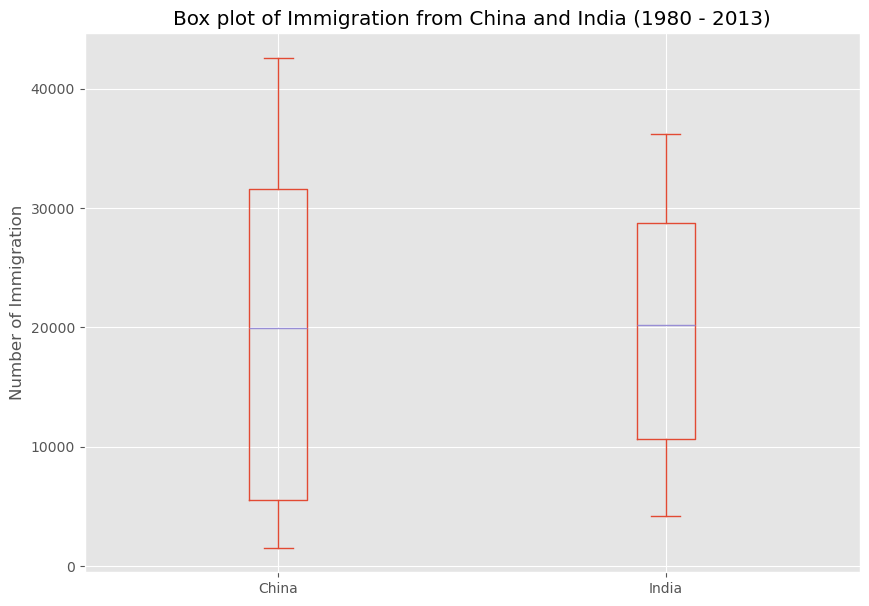

In [27]:
df_CI.plot(kind = 'box', figsize = (10, 7))

plt.title('Box plot of Immigration from China and India (1980 - 2013)')
plt.ylabel('Number of Immigration')
plt.show()

We can observe that, while both countries have around the same median immigrant population (~20,000), China's immigrant population range is more spread out than India's. The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).

If you prefer to create horizontal box plots, you can pass the vert parameter in the plot function and assign it to False. You can also specify a different color in case you are not a big fan of the default red color.

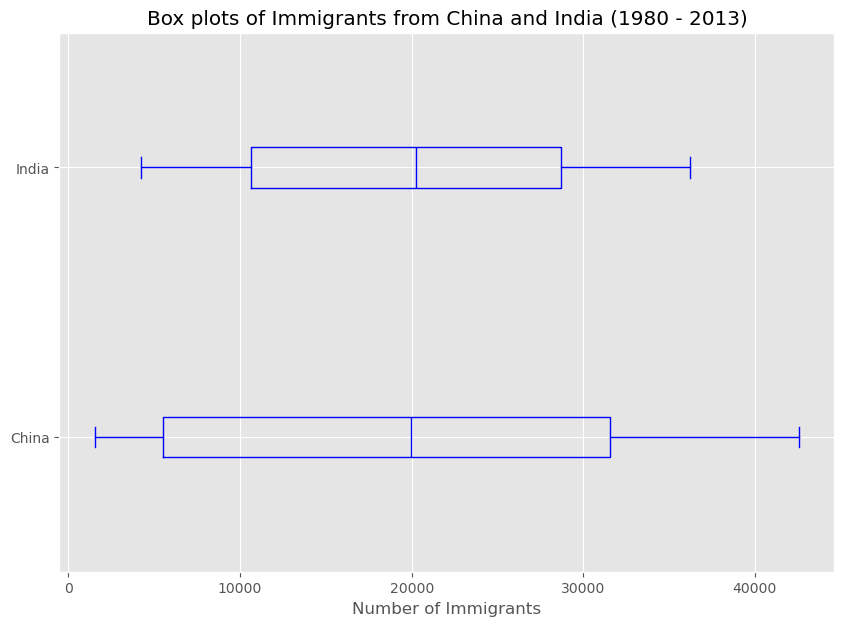

In [28]:
df_CI.plot(kind = 'box', figsize  = (10,7), color = 'blue', vert = False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

**Subplots**

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**.

Typical syntax is : <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Where

*   `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,
*   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` \* `ncols` as shown below.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig5Subplots_V2.png" width="500" align="center">


We can then specify which subplot to place each plot by passing in the ax paramemter in plot() method as follows:

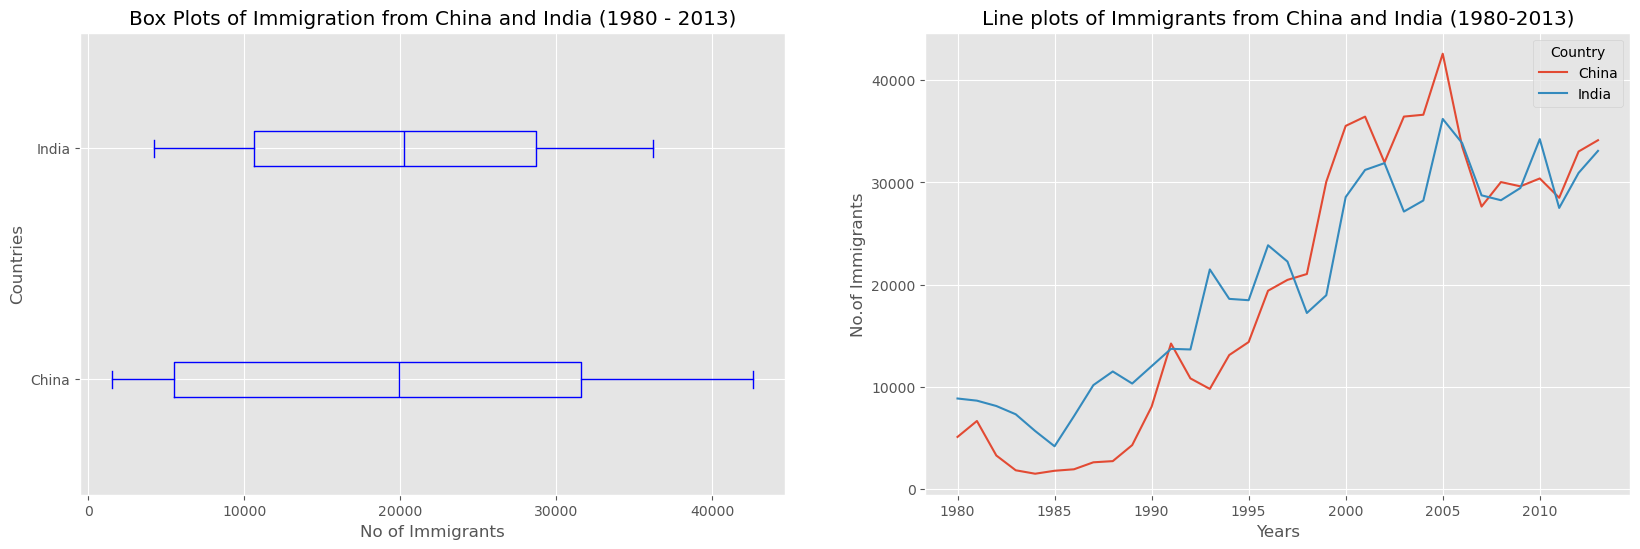

In [29]:
fig = plt.figure()

ax0 = fig.add_subplot(1,2,1) #add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1,2,2) #add subplot 2 (1 row, 2 columns, second plot)

#subplot 1: Box plot
df_CI.plot(kind = 'box', color = 'blue', vert = False, figsize = (20,6), ax = ax0) #add to subplot 1
ax0.set_title('Box Plots of Immigration from China and India (1980 - 2013)')
ax0.set_xlabel('No of Immigrants')
ax0.set_ylabel('Countries')

#subplot 2: Line plot
df_CI.plot(kind = 'line', figsize = (20,6), ax = ax1)
ax1.set_title('Line plots of Immigrants from China and India (1980-2013)')
ax1.set_ylabel('No.of Immigrants')
ax1.set_xlabel('Years')

plt.show()

**Tip regarding subplot convention**

In the case when `nrows`, `ncols`, and `plot_number` are all less than 10, a convenience exists such that a 3-digit number can be given instead, where the hundreds represent `nrows`, the tens represent `ncols` and the units represent `plot_number`. For instance,

```python
   subplot(211) == subplot(2, 1, 1) 
```

produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).

Let's try something a little more advanced.

Previously we identified the top 15 countries based on total immigration from 1980 - 2013.

**Question:** Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the *decades* `1980s`, `1990s`, and `2000s`.

Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe df_top15.

In [30]:
df_top15 = df.sort_values(['Total'], ascending = False, axis = 0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:

1.  Create a list of all years in decades 80's, 90's, and 00's.
2.  Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
3.  Merge the three series into a new data frame. Call your dataframe **new_df**.

In [33]:
years_80s = list(map(str, range(1980,1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))

df_80s = df_top15.loc[:, years_80s].sum(axis = 1)
df_90s = df_top15.loc[:, years_90s].sum(axis=1)
df_00s = df_top15.loc[:, years_00s].sum(axis = 1)

new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s': df_00s})

new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


Let's learn more about the statistics associated with the dataframe using the `describe()` method

In [35]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


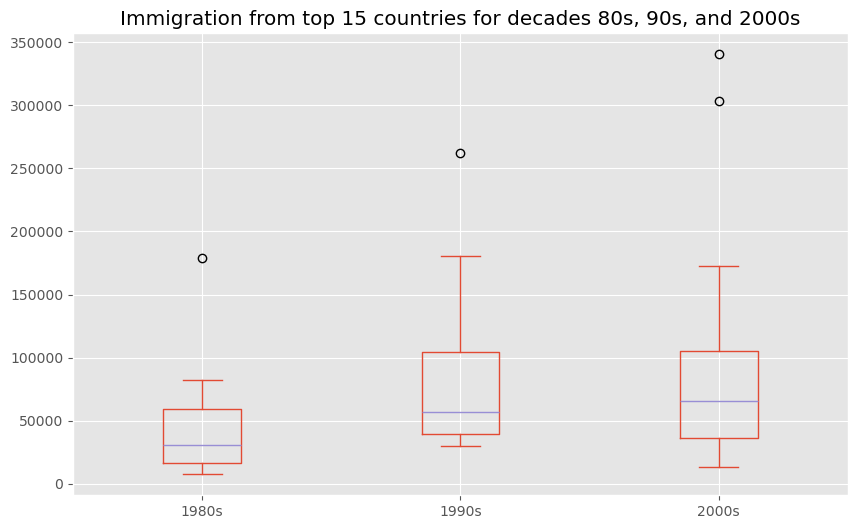

In [36]:
#step - 3 plot the graph
new_df.plot(kind = 'box', figsize = (10,6))

plt.title('Immigration from top 15 countries for decades 80s, 90s, and 2000s')

plt.show()

Note how the box plot differs from the summary table created. the box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:

- Larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
- Samller than Q1 by at least 1.5 times the IQR.

Let's look at decade 2000s as an example:

- Q1(25%) = 36,101.5
- Q3 (75%) = 105,505.5
- IQR = Q3 - Q1 = 69,404

Using the definition of outlier, any value that is greater than Q3 by 1.5times IQR will be flagged as outlier.

- Outlier > 105,505.5 + (1.5*69,404)
- Outlier > 209,611.5

In [37]:
new_df = new_df.reset_index()
new_df[new_df['2000s']> 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


China and India are both considered as outliers since their population for the decade exceeds 209,611.5

The box plot is an advanced visualization tool, and there are many options and customizations that exceed the scope of this project.

## Scatter Plots

A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. while the data points are connected in a scatter polt. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationshipand use it to predict trends outside the dataset. 

Let's start by exploring the following:

Using a scatter plot let's visualize he trend of total im migration to Canada (all countries combined) for the years 1980 - 2013.

Step 1: Get the dataset. Since we are expecting to use the relationship between years and total population, we will first convert years to int type

In [38]:
#we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df[years].sum(axis = 0))

df_tot.index = map(int, df_tot.index)

df_tot.reset_index(inplace = True)

df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Step 2 - Plot the data in `matplotlib`, we can create a scatter plot set, by passing in `kind = 'sactter` as plotargument. We will also need to pass in `x` and `y` keywords to specify the column that go on the x and y axis.

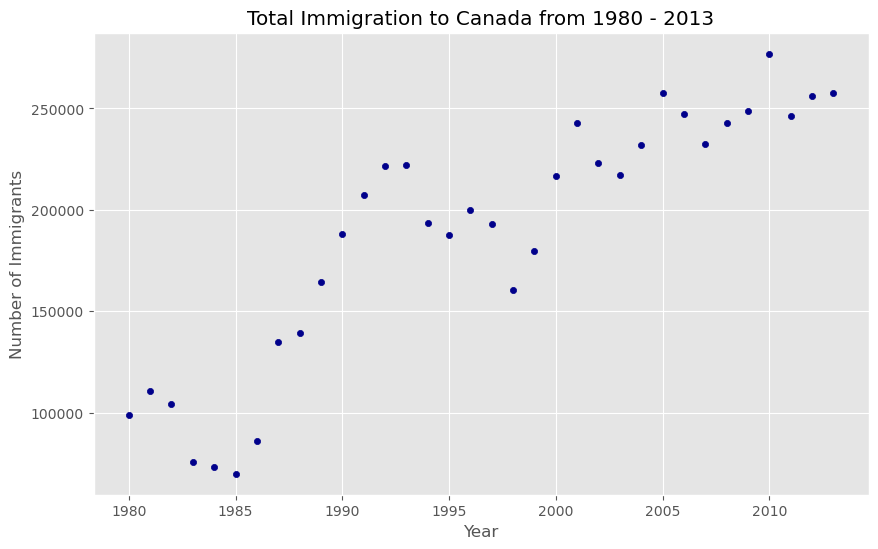

In [39]:
df_tot.plot(kind = 'scatter', x = 'year', y = 'total', figsize = (10,6), color = 'darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Fom the above graph we can notice that, how the scatter plot does not connect the data points together. We can clearly observe an upward trend in the data as the years go by, the total no of immigrants increases. We can mathematically analyze this upward trend using a regression line (line of best fit).

So let's try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

Step 1 - We need the equation of line that best fits the data. We will use **Numpy's** `polyfit()` method by passing the following:

- `x` - x coordinates of the data.
- `y` - y coordinates of the data.
- `deg` - Degree of fitting polynomial, 1 = linear, 2 = quadratic, 3 = cubic and so on. 

In [41]:
x= df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg = 1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial powes first. Since we are plotting linear regression `y = mx + c`, our output has 2 elements `[5.56709228e+03, -1.09261952e+07]` with the slope n position 0 and the intercept in position 1.

Step 2 - Plot the regression line on `scatter plot`.

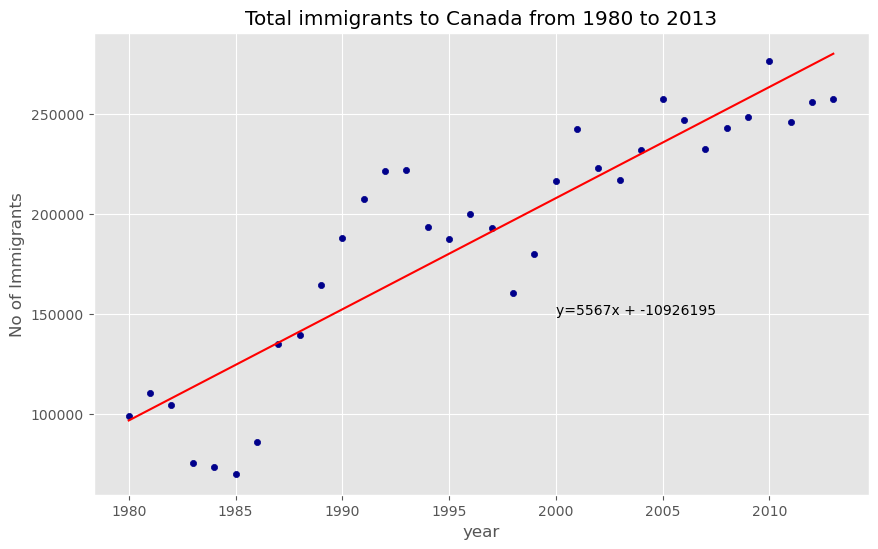

'No. Immigrants = 5567*year+-10926195'

In [43]:
df_tot.plot(kind = 'scatter', x = 'year', y = 'total', figsize = (10,6), color = 'darkblue')

plt.title('Total immigrants to Canada from 1980 to 2013')
plt.xlabel('year')
plt.ylabel('No of Immigrants')

#let's plot line of beat fit
plt.plot(x, fit[0]*x + fit[1], color = 'red')
plt.annotate('y={0:.0f}x + {1:.0f}'.format(fit[0], fit[1]), xy = (2000, 150000))

plt.show()

#print out the line of best fit
'No. Immigrants = {0:.0f}*year+{1:.0f}'.format(fit[0],fit[1])

Using the equation of line of best fit, we can estimate the no of immigrants in 2015:

```python
No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310
```

When compared to the actual from citizenship and immigration Canada's(CIC) [2016 Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01), we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations(and might differ slightly from CIC data).

As aside note, we can observ that immigration took a dip around 1993-1997. Further analysis into the topic revelead that in 1993 canad introduce BillC-86 which introduces revisions to the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship required for 'assisted relatives' and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years - (data from IBM Data Science course)

Question - Create a scatter plot of total immigrants to Canada from Denmark, Norway and Sweden from 1980 to 2013.

In [45]:
df_countries = df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

df_total = pd.DataFrame(df_countries.sum(axis = 1))

df_total.reset_index(inplace = True)

df_total.columns = ['year', 'total']

df_total['year'] = df_total['year'].astype(int)

df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


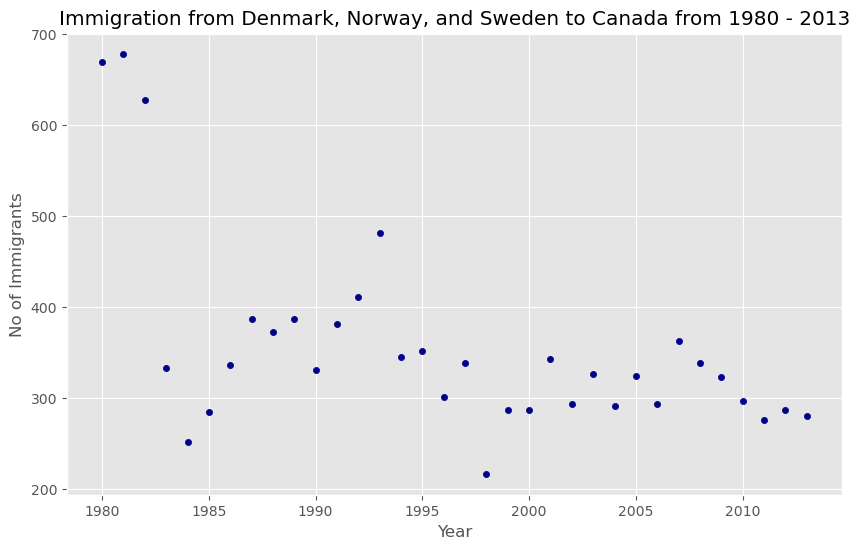

In [46]:
df_total.plot(kind = 'scatter', x = 'year', y = 'total', figsize = (10,6), color = 'darkblue')

plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')

plt.xlabel('Year')
plt.ylabel('No of Immigrants')

plt.show()

## Bubble Plots

A bubble plot is a variation of the scatter plot that displays three dimensions of data (x,y,z). The data points are replaced with bubbles, and the size of the bubble is determined by the third variable `z`, also known as weight. In matplotlib, we can pass in an array or scalar to the parameter `s` to `plot()`, that contains the weight of each point.

### Let's start by analyzing the effect of Argentina's great depression.

Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the normalized value of the population for each year.

Step - 1 Let's collect the data for Brazil and Argentina like in the previous example, we will convert the `years` to type int and include it in thje dataframe.

In [47]:
df_transpose = df[years].transpose()

df_transpose.index = map(int, df_transpose.index)

df_transpose.index.name = 'Year'

df_transpose.reset_index(inplace = True)

df_transpose.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


**Step 2**: Create the Normalized weights.

There are several methods of normalizations in statistics, ech with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) to bring all values into the range [0,1]. The general formula is:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig3FeatureScaling.png" align="center">

When X is the original value, X' is sthe corresponding normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the data points are scaled to a value between 0 - 1 accorindgly

In [48]:
# normalize Brazil data
norm_brazil = (df_transpose['Brazil'] - df_transpose['Brazil'].min())  / (df_transpose['Brazil'].max() - df_transpose['Brazil'].min())

#normalize argentina data
norm_argentina = (df_transpose['Argentina'] - df_transpose['Argentina'].min()) / (df_transpose['Argentina'].max() - df_transpose['Argentina'].min())

**Step 3**: plot the data.

- To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter.
- We will also pass in the weight using the `s` parameter. Give that the normalized weights are between 0-1, they won't be visible on the plot.

Therfore, we will:

- multiply weights by 2000 to scale it up on the graph, and,
- add 10 to compensate for the min value (which has a 0 weight and therefore scale with x2000).

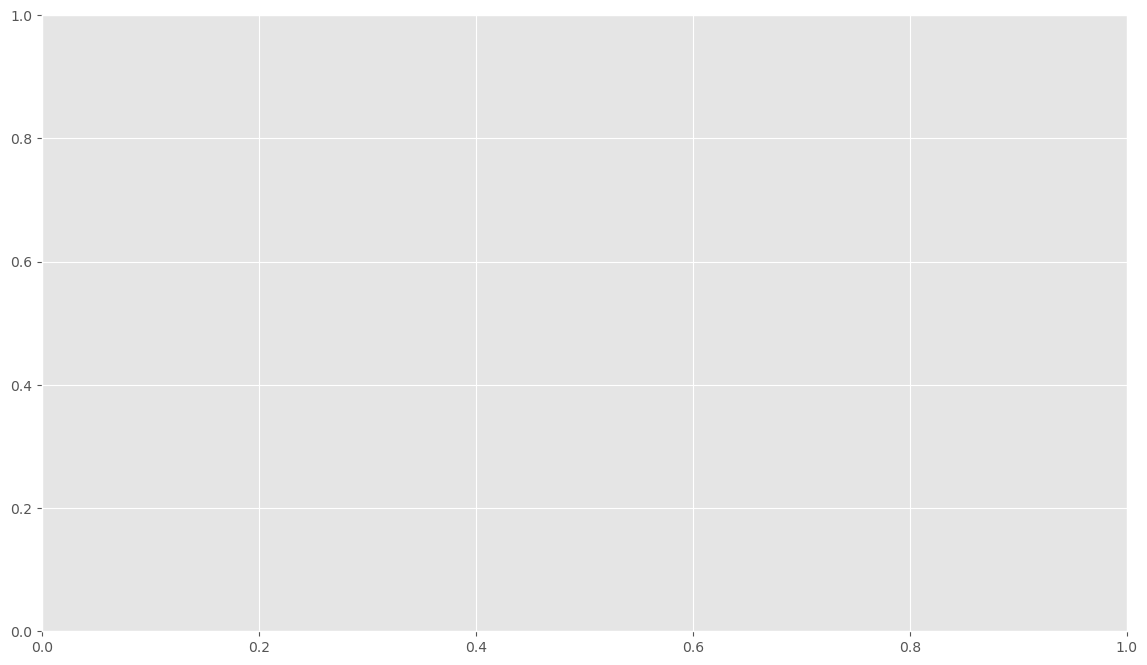

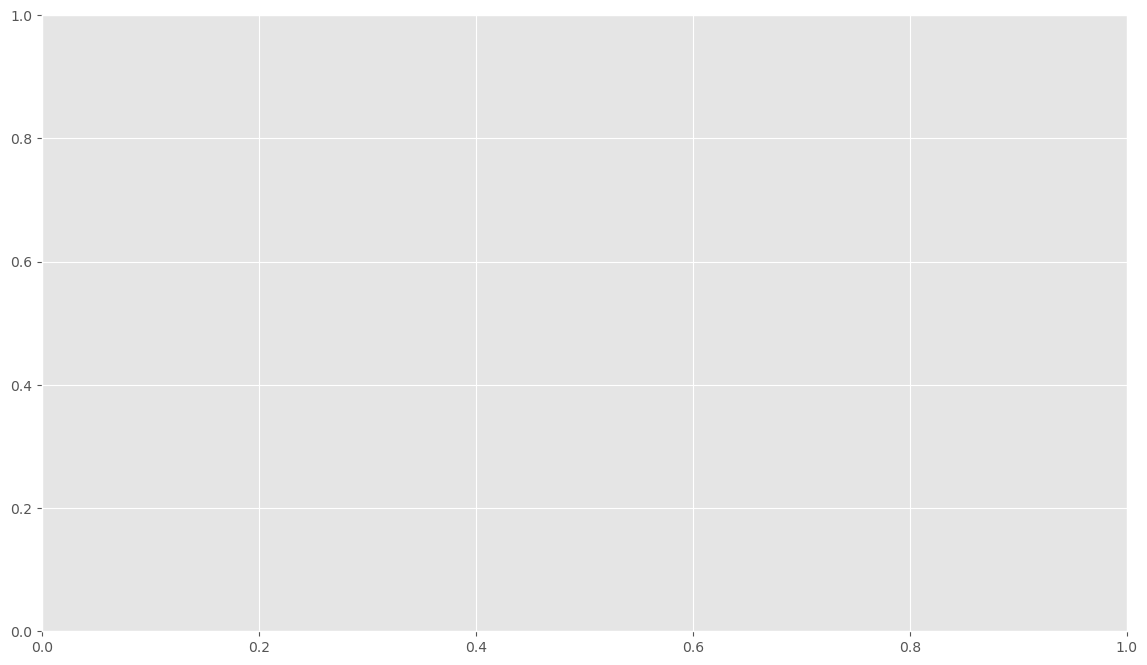

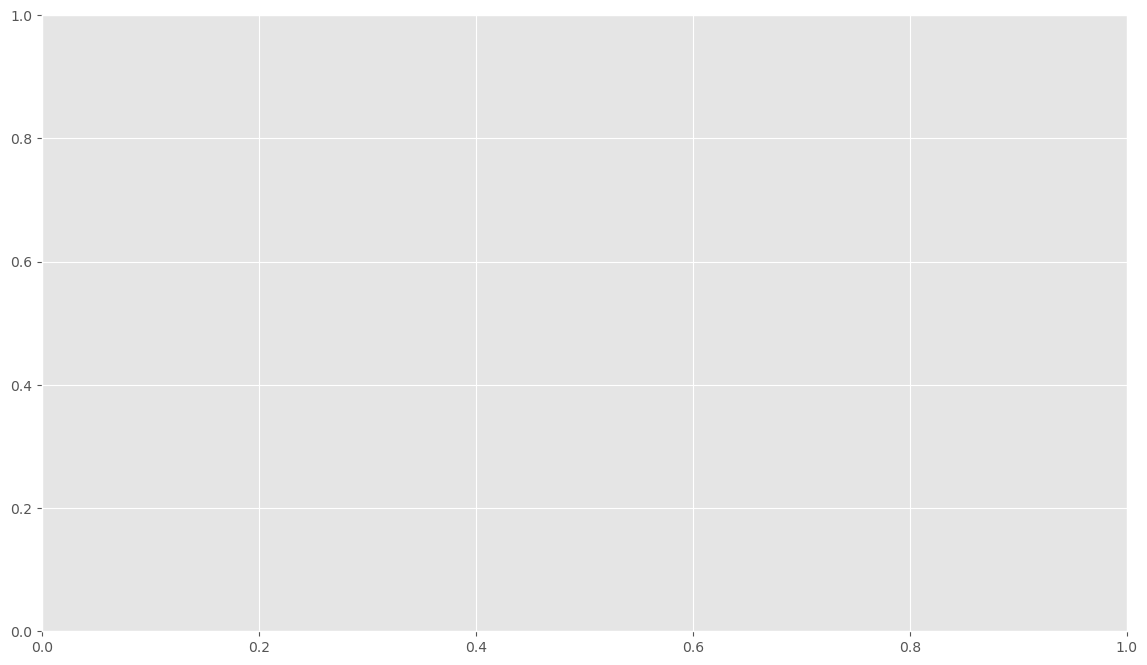

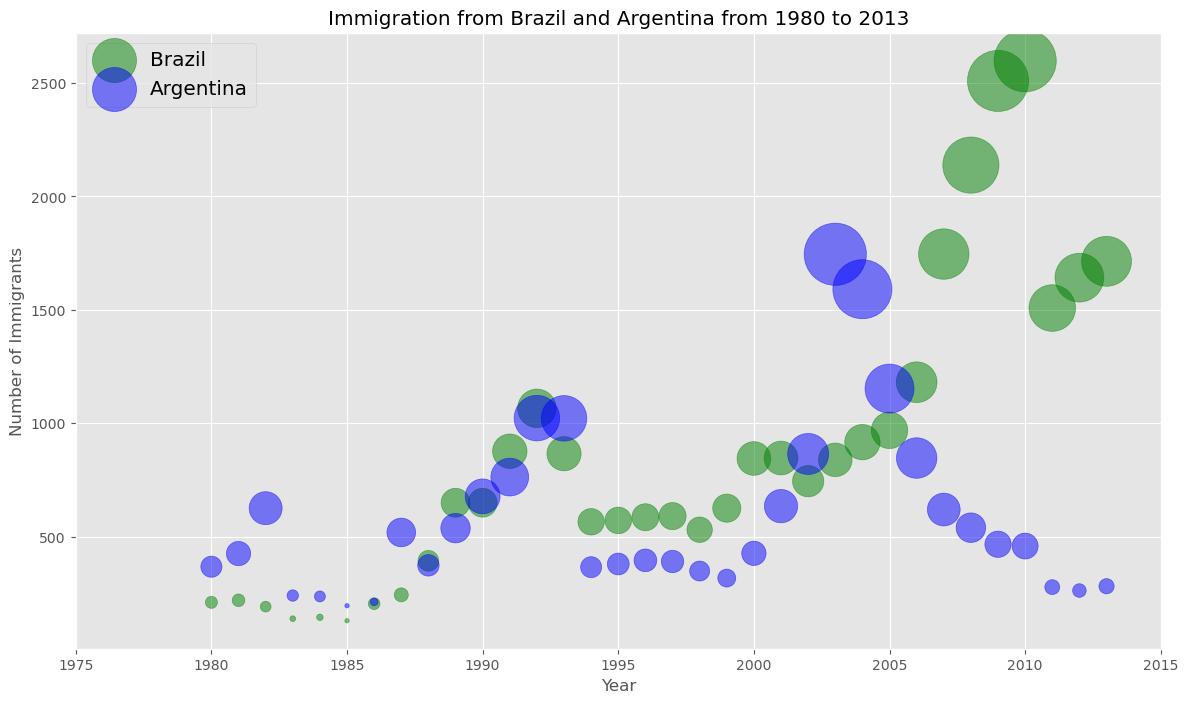

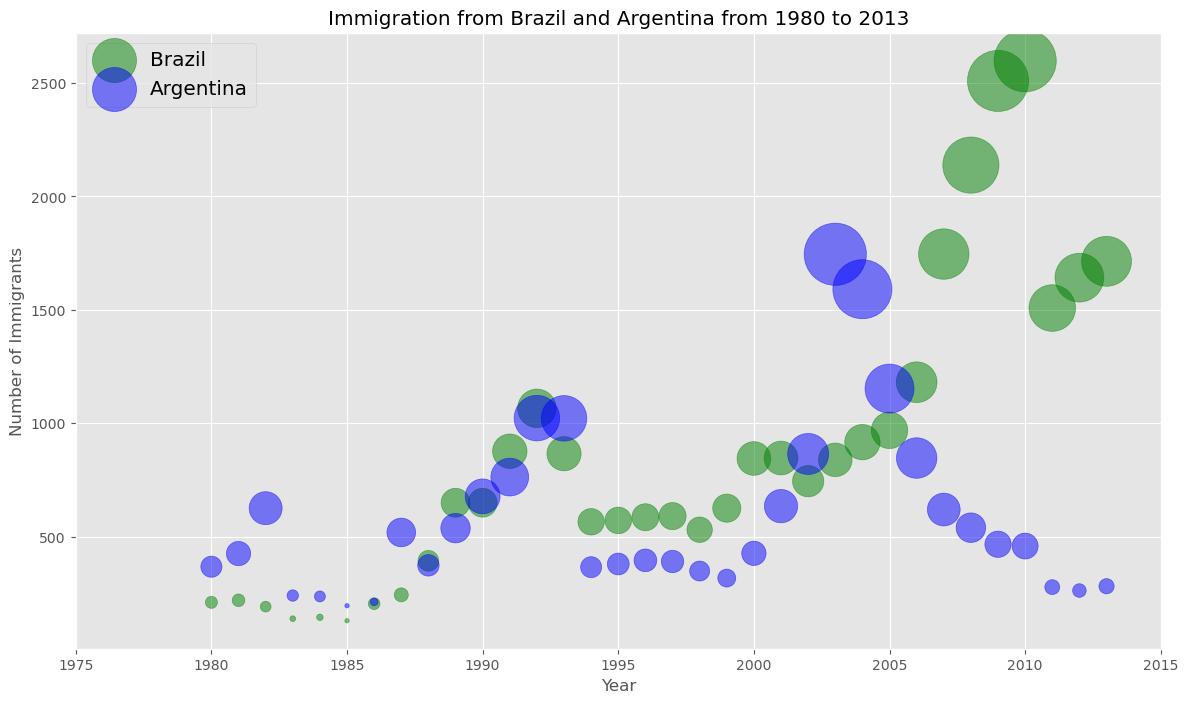

In [56]:
# Brazil
ax0 = df_transpose.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_transpose.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

plt.show()

In [53]:
df.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble is, the more immigrants are in that year.

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 to 1990, just before the onset of 1998 - 2002 great depression.

On a similar note, Brazil suffered the Samba Effect where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.

Step 1: Normalize the data pertaining to China and India.

In [59]:
norm_china = (df_transpose['China'] - df_transpose['China'].min()) / (df_transpose['China'].max() - df_transpose['China'].min())
    # normalized Indian data
norm_india = (df_transpose['India'] - df_transpose['India'].min()) / (df_transpose['India'].max() - df_transpose['India'].min())

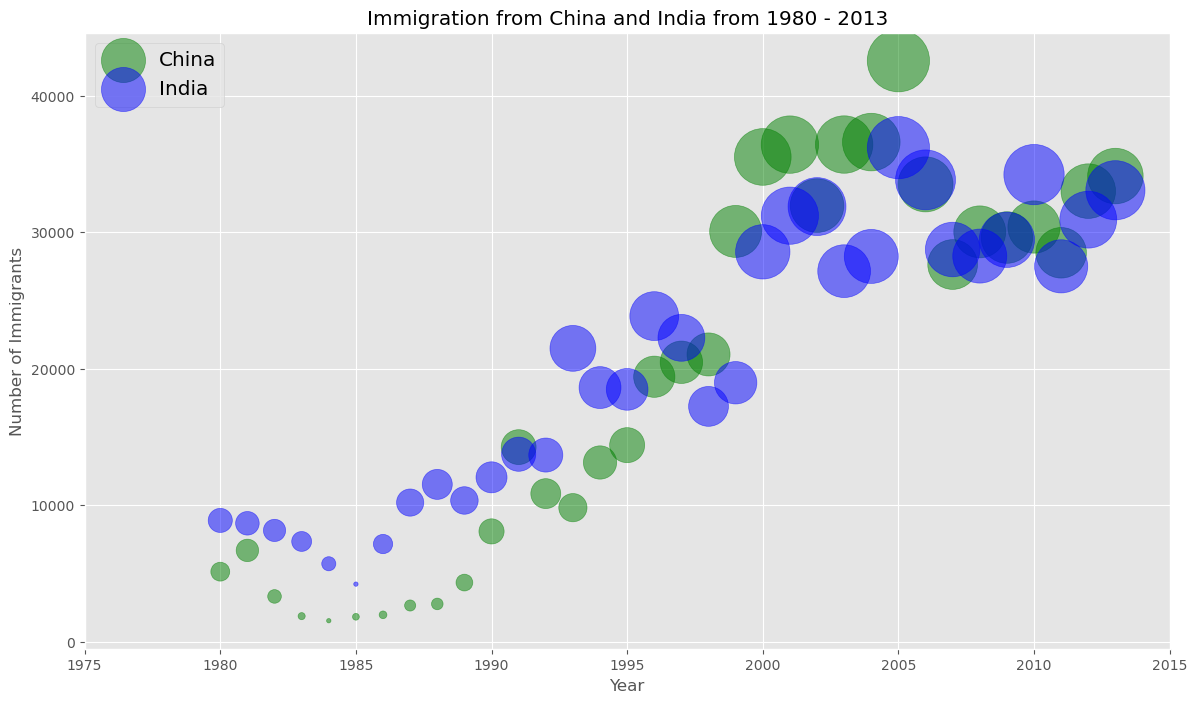

In [62]:
# China
ax0 = df_transpose.plot(kind='scatter',
                        x='Year',
                        y='China',
                        figsize=(14, 8),
                        alpha=0.5,                  # transparency
                        color='green',
                        s=norm_china * 2000 + 10,  # pass in weights 
                        xlim=(1975, 2015)
                       )

# India
ax1 = df_transpose.plot(kind='scatter',
                        x='Year',
                        y='India',
                        alpha=0.5,
                        color="blue",
                        s=norm_india * 2000 + 10,
                        ax = ax0
                       )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

plt.show()